# Problem Set 1

This problem set is meant to help you familiarize yourself with Python and Pandas. This is meant to be a very gentle introduction -- if you find this problem set to be difficult, you might want to consider taking a more introductory course.

### Before You Start
For this problem set, you should download INF0251-PS1.ipynb from bCourses. Create a local copy of the notebook and rename it LASTNAME_FIRSTNAME-PS1.ipynb. Then edit your renamed file directly in your browser by typing:
```
jupyter notebook <name_of_downloaded_file>
```

Make sure the following libraries load correctly (hit Ctrl-Enter).


In [2]:
#IPython is what you are using now to run the notebook
import IPython
print("IPython version:      %6.6s (need at least 1.0)" % IPython.__version__)

# Numpy is a library for working with Arrays
import numpy as np
print("Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print("SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print("Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib
print("Maplotlib version:    %6.6s (need at least 1.2.1)" % matplotlib.__version__)

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print("Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)

IPython version:      7.19.0 (need at least 1.0)
Numpy version:        1.19.5 (need at least 1.7.1)
SciPy version:         1.6.0 (need at least 0.12.0)
Pandas version:        1.2.1 (need at least 0.11.0)
Maplotlib version:     3.3.3 (need at least 1.2.1)
Scikit-Learn version: 0.24.1 (need at least 0.13.1)


### Working in a group?
List the names of other students with whom you worked on this problem set:
- *Person 1*
- *Person 2*
- ...

---

## Introduction to the assignment

For this assignment, you will be using the [Boston Housing Prices Data Set]( https://archive.ics.uci.edu/ml/machine-learning-databases/housing/).  Please read about the dataset carefully before continuing -- it is worth investing a few minutes up front otherwise you are likely to be hopelessly confused! Also, if you're new to analyzing data in Python, please make sure to read the relevant readings linked to on Canvas before beginning, otherwise you'll be stabbing in the dark.

You can read more about the dataset [here](http://lib.stat.cmu.edu/datasets/boston)

Use the following commands to load the dataset:


In [3]:
from sklearn.datasets import load_boston
bdata = load_boston()

The following commands will provide some basic information about the shape of the data:

In [4]:
print(bdata.keys())
print(bdata.feature_names)
print(bdata.data.shape)
print(bdata.target.shape)

# uncomment the following if you want to see a lengthy description of the dataset
# print(bdata.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)


In [5]:
boston = pd.DataFrame(bdata.data)
boston.columns = bdata.feature_names

In [6]:
boston['MEDV'] = bdata.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


---

## Part 1: Descriptive analysis

### 1.1: Explore the data

Let's dig into the data a bit to see what we're dealing with. The first thing to do is to make sure you understand how the data is organized, what the data types are, whether there is any missing data, and so forth. Get your bearings on your own, then answer the following questions.

 - 1.1.1: How many different variables are there in the dataset, and how many different observations?
 - 1.1.2: How many instances are classified as neighborhoods where the tract bounds the Charles River? 
 - 1.1.3: Show that dataset does not contain any missing values.
 - 1.1.4: Display the property tax rate in the 5 neighborhoods that have the highest median housing price.

In [7]:
#I added target variable 'MEDV' to the data frame.

In [8]:
#1.1.1
#506 observations and 14 variables
boston.shape

(506, 14)

In [9]:
#1.1.2
#35 instances
boston[boston['CHAS'] == 1].shape

(35, 14)

In [10]:
#1.1.3
boston.isnull().sum().sum()

0

In [11]:
#1.1.4
#sort median housing price first, then select first 5 values of property tax rate
boston.sort_values(by='MEDV', ascending=False)['TAX'][:5]

283    198.0
225    307.0
369    666.0
370    666.0
371    666.0
Name: TAX, dtype: float64

### 1.2: Answer some basic questions
 - 1.2.1: What is the median housing price in Boston's most expensive neighborhood? (As far as ties are concerned, just use the top 5 values to break the ties)
 - 1.2.2: How many neighborhoods have, on average, less than 3 rooms per dwelling?
 - 1.2.3: What is the property tax rate in the least expensive neighborhood that is also adjacent to the Charles River?
 - 1.2.4: What is the crime rate in the neighborhood with the highest median housing price? 
 - 1.2.5: What is the crime rate in the neighborhood with the lowest median housing price?


In [12]:
#1.2.1
#the median housing price in Boston's most expensive neighborhood is 50
boston.sort_values(by='MEDV', ascending=False)['MEDV'].iloc[0]

50.0

In [13]:
#1.2.2
sum(boston['RM'] < 3)

0

In [14]:
#1.2.3
df = boston.sort_values(by='MEDV', ascending=True)
df[df['CHAS']== 1]['TAX'].iloc[0]

403.0

In [15]:
#1.2.4
boston.sort_values(by='MEDV', ascending=False)['CRIM'][:5]

283    0.01501
225    0.52693
369    5.66998
370    6.53876
371    9.23230
Name: CRIM, dtype: float64

In [16]:
#1.2.5
boston.sort_values(by='MEDV', ascending=True)['CRIM'][:2]

398    38.3518
405    67.9208
Name: CRIM, dtype: float64

### 1.3: Summary statistics

Create a clean, organized table that shows just the following information (no more, no less) for each variable in the dataset. Note that your table should have K rows (one for each variable) and 7 columns, ordered as below:
 - The name of the variable
 - The number of observations with non-missing values
 - The mean of the variable
 - The standard deviation of the variable
 - The minimum value of the variable
 - The median of the variable
 - The maximum value of the variable

In [17]:
df = pd.DataFrame(np.zeros((14,7)), columns=['name', 'num of non-missing obs', 'mean','sd','min','median','max'])

In [18]:
df['name'] = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV']
df['num of non-missing obs'] = np.array(boston.count())
df['mean'] = np.array(boston.mean())
df['sd'] = np.array(boston.std())
df['min'] = np.array(boston.min())
df['median'] = np.array(boston.median())
df['max'] = np.array(boston.max())

In [19]:
df

,name,num of non-missing obs,mean,sd,min,median,max
0,CRIM,506,3.613524,8.601545,0.00632,0.25651,88.9762
1,ZN,506,11.363636,23.322453,0.00000,0.00000,100.0000
2,INDUS,506,11.136779,6.860353,0.46000,9.69000,27.7400
3,CHAS,506,0.069170,0.253994,0.00000,0.00000,1.0000
4,NOX,506,0.554695,0.115878,0.38500,0.53800,0.8710
5,RM,506,6.284634,0.702617,3.56100,6.20850,8.7800
6,AGE,506,68.574901,28.148861,2.90000,77.50000,100.0000
7,DIS,506,3.795043,2.105710,1.12960,3.20745,12.1265
8,RAD,506,9.549407,8.707259,1.00000,5.00000,24.0000
9,TAX,506,408.237154,168.537116,187.00000,330.00000,711.0000


### 1.4 Simple statistical tests

Is the median house value in locations that are adjacent to the Charles River different from the median house value in locations that are not adjacent to the Charles River? Use a t-test to answer this question. Clearly state the null and alternative hypothesis for your test.

**null hypothesis**: the median house value in locations that are adjacent to the Charles River is **same** as that are not adjacent to the Charles River  

**alternative hypothesis**: the median house value in locations that are adjacent to the Charles River is different from that are not adjacent to the Charles River


In [20]:
sample1 = boston[boston['CHAS'] == 1]['MEDV']
sample2 = boston[boston['CHAS'] == 0]['MEDV']
from scipy.stats import ttest_ind
ttest_ind(sample1, sample2)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

p-value < 5%, thus we reject the null

### 1.5 Simple Linear Regression

Estimate a linear regression of housing value (the dependent variable) on "% lower status of the population" (the independent variable), with no other control variables. Interpret the coefficients and standard errors. Interpret the R2 value. Based on this evidence, can you conclude anything about the causal effect of increasing the "% lower status of the population" on housing value?

In [21]:
x = np.reshape(np.array(boston['LSTAT']), (-1,1))
y = boston['MEDV']

In [22]:
import statsmodels.api as sm
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 24 Jan 2021   Prob (F-statistic):           5.08e-88
Time:                        11:02:25   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
x1            -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Coefficient for `LSTAT` is -0.9500. SD is 0.039. It is statistically significant in predicting 'MEDV'  
R-squared means our model explains 54.4% of the variance in dependent variable  
We cannot conclude causal effect because in this setting we can only say association.

---

## Part 2: Histograms and Boxplots


### 2.1: Histogram of housing prices

Below you will find some very basic code to make a very basic histogram of median housing prices (the "target" variable) for your dataset.  Your first task is to make this graph look pretty by doing the following:

1. Add appropriate labels to the x and y axes, make sure to include units
2. Change the bin width on the histogram to be $1000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green, and remove the black borders from the bars


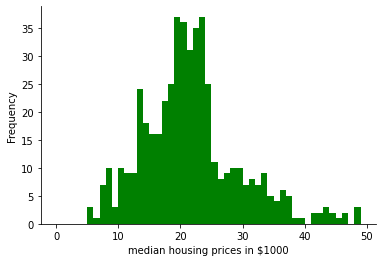

In [23]:
# prepare IPython to work with matplotlib and import the library to something convenient
# %matplotlib inline  
import matplotlib.pyplot as plt  
fig, ax = plt.subplots()

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#Change the bin width on the histogram to be $1000, every bar is now representing $1000
bins_list = list(range(0, 50, 1))

#Change the color of the bars to be green, and remove the black borders from the bars
plt.hist(bdata.target, color='green',edgecolor='none', bins=bins_list)

#Add appropriate labels to the x and y axes, make sure to include units
plt.xlabel('median housing prices in $1000')
plt.ylabel('Frequency')


plt.show()

### 2.2: Boxplot of housing prices

Create a **horizontal** boxplot that shows the distribution of the median value of houses (y-axis) that are adjacent to the Charles river and the houses that are not adjacent to the Charles rivers. Properly label your axes, and make sure that your graphic looks polished and professional.

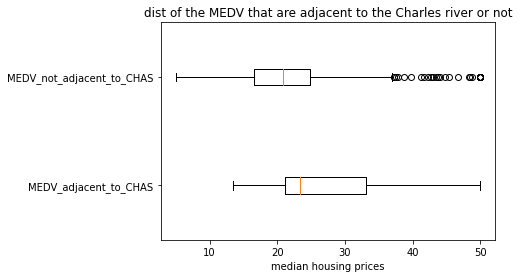

In [25]:
MEDV_adjacent_to_CHAS = boston[boston['CHAS'] == 1]['MEDV']
MEDV_not_adjacent_to_CHAS = boston[boston['CHAS'] == 0]['MEDV']
fig, ax = plt.subplots()
ax.boxplot([MEDV_adjacent_to_CHAS, MEDV_not_adjacent_to_CHAS], labels=['MEDV_adjacent_to_CHAS', 'MEDV_not_adjacent_to_CHAS']
          ,vert=False)
ax.set_title('dist of the MEDV that are adjacent to the Charles river or not')
ax.set_xlabel('median housing prices')
plt.show()

### 2.3: Interpret

What do you observe in the above boxplots? Explain in terms of the various elements of the distribution. Does there appear to be a difference between distribution of the median housing prices adjacent to Charles river and the ones not adjacent to Charles river? 

In [253]:
MEDV_adjacent_to_CHAS.describe()

count    35.000000
mean     28.440000
std      11.816643
min      13.400000
25%      21.100000
50%      23.300000
75%      33.150000
max      50.000000
Name: MEDV, dtype: float64

In [255]:
MEDV_not_adjacent_to_CHAS.describe()

count    471.000000
mean      22.093843
std        8.831362
min        5.000000
25%       16.600000
50%       20.900000
75%       24.800000
max       50.000000
Name: MEDV, dtype: float64

Yes, we conducted t-test above. Also, from the boxplot, we can see the median and median of median housing prices adjacent to Charles river is larger than median housing prices not adjacent to Charles river

### 2.4 Correlation Matrix

Calculate the correlation of every pair of variables in the dataset. Create a *K* x *K* matrix where the value in the (*i*,*j*) cell is the correlation between the *i*th and *j*th variable. Show off your skills by coloring the cell so that large positive correlations appear green and large negative correlations appear red (use a gradient to make this pretty). What two variables appear to me most positively and negatively correlated?

In [268]:
corr = boston.corr()
corr.style.background_gradient(cmap='RdYlGn').set_precision(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


In [270]:
corr.min()

CRIM      -0.388305
ZN        -0.569537
INDUS     -0.708027
CHAS      -0.121515
NOX       -0.769230
RM        -0.613808
AGE       -0.747881
DIS       -0.769230
RAD       -0.494588
TAX       -0.534432
PTRATIO   -0.507787
B         -0.444413
LSTAT     -0.737663
MEDV      -0.737663
dtype: float64

TAX and RAD are the most positively correlated  
DIS and NOX are the most negatively correlated

### 2.5 Create your own (creative and effective) visualization

Use another type of graph or chart to illustrate an interesting pattern in the data.  Be creative in your visualization, and make sure to produce a "publication-quality" graph.  Points will be given for useful and creative graphs; points will be deducted for confusing issues like unlabeled axes.  If you're new to data visualization, [this guide](http://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.28.1.209) is a good place to start.

<Figure size 216x216 with 0 Axes>

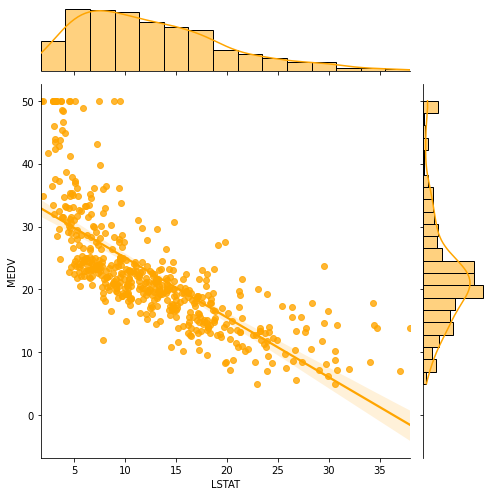

In [284]:
import seaborn as sns
plt.figure(figsize=(3,3))
sns.jointplot(x = 'LSTAT', y = 'MEDV', data = boston, kind = 'reg', height = 7, color = 'orange')
